## Ramon Brand - Session 3 - MNist Regularization vs Dropout
### Overview
The idea of this exercise is to see how to mitigate overfitting in a model.

### Part 1 - Finding an overfitting model
First we need to find a model which overfits.

In [6]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model -- Same as our last successful model using normal MNIST digits
model = Sequential()

# -- First layer
model.add(Dense(800, input_shape=(28 * 28,), activation="relu"))

# -- Second layer
model.add(Dense(600, activation="relu"))

# -- Third layer
model.add(Dense(400, activation="relu"))

# -- Last layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=50, batch_size=1024, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_17 (Dense)             (None, 600)               480600    
_________________________________________________________________
dense_18 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                4010      
Total params: 1,353,010
Trainable params: 1,353,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.6664 - acc: 0.7678 - val_loss: 0.4439 - val_acc: 0.8424
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss

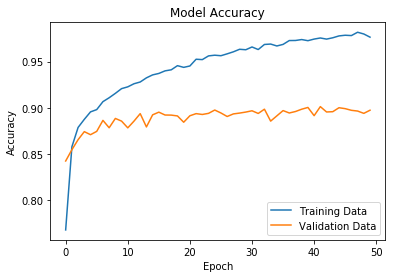

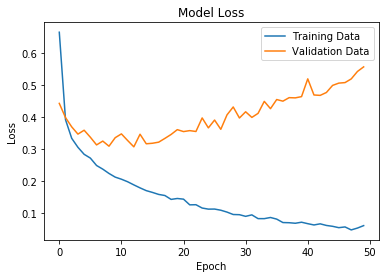

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Data", "Validation Data"], loc="lower right")
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"], loc="upper right")
plt.show()

After trying many different setups, I found that narrowing down each layer seems to induce overfitting more than having equal size layers. It also seems that equal size layers actually perform quite a bit worse, even if they contain more neurons.

The graphs above show clearly that around epoch 5 the model starts to overfit, and past epoch 15 the validation loss actually increases. This will be a great model to test on.


### Part 2 - Regularization

In [20]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import regularizers

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model -- Same as our last successful model using normal MNIST digits
model = Sequential()

# -- First layer
model.add(Dense(800, input_shape=(28 * 28,), activation="relu", kernel_regularizer=regularizers.l2(0.04)))

# -- Second layer
model.add(Dense(600, activation="relu"))

# -- Third layer
model.add(Dense(400, activation="relu"))

# -- Last layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=50, batch_size=1024, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_53 (Dense)             (None, 600)               480600    
_________________________________________________________________
dense_54 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                4010      
Total params: 1,353,010
Trainable params: 1,353,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 29us/step - loss: 10.8807 - acc: 0.7619 - val_loss: 1.6615 - val_acc: 0.7760
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - los

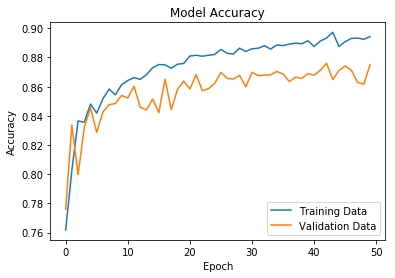

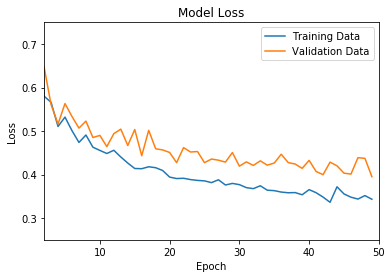

In [30]:
import matplotlib.pyplot as plt

plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Data", "Validation Data"], loc="lower right")
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlim([2,50])
plt.ylim([0.25,0.75])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"], loc="upper right")
plt.show()

After many, many, **MANY** tests, I settled on the setup above.

I found that adding regularization does bring the training and validation accuracy closer together, however, the validation accuracy overall is not any better than it was earlier.

Without regularization, the training accuracy plataued at 0.97, and the validation accuracy plataued at 0.89. The problem is, even with the large gap, the validation accuracy of 0.89 is still higher than the validation accuracy of 0.87 of the model with regularization.

### Part 3 - Dropout Layers
Let's try drop out layers.

In [41]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import regularizers

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model -- Same as our last successful model using normal MNIST digits
model = Sequential()

# -- First layer
model.add(Dense(800, input_shape=(28 * 28,), activation="relu"))

# -- Dropout layer
model.add(Dropout(0.5))

# -- Second layer
model.add(Dense(600, activation="relu"))

# -- Dropout layer
model.add(Dropout(0.5))

# -- Third layer
model.add(Dense(400, activation="relu"))

# -- Dropout layer
model.add(Dropout(0.5))

# -- Last layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=50, batch_size=1024, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 600)               480600    
_________________________________________________________________
dropout_9 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 10)                4010      
Total para

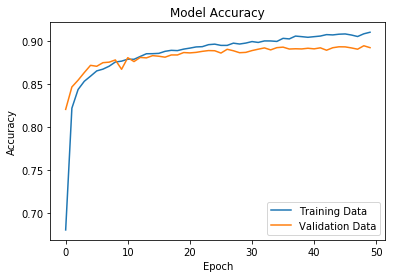

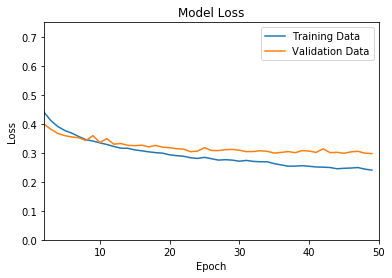

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Data", "Validation Data"], loc="lower right")
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlim([2,50])
plt.ylim([0,0.75])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"], loc="upper right")
plt.show()

The result of using dropout layers is quite surprising. It took much longer to train the network, around 10 minutes for the above model, and it is clear the training and validation accuracy is much closer together. However, the overall accuracy of the validation data is not really much better than the validation data of the original model without dropout layers. 